In [ ]:
# 1. Vérifier la disponibilité du GPU
import torch
print("GPU disponible:", torch.cuda.is_available())
print("Nom du GPU:", torch.cuda.get_device_name(0))

# 2. Installer Kaggle pour télécharger le dataset
!pip install kaggle

GPU disponible: True
Nom du GPU: Tesla T4


In [ ]:
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)

100%|██████████| 9.91M/9.91M [00:00<00:00, 49.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.72MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.9MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.46MB/s]


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class CNN_MNIST(nn.Module):
    def __init__(self):
        super(CNN_MNIST, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN_MNIST().to(device)

import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Boucle d'entraînement
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

for epoch in range(10):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

Epoch 1, Loss: 0.20571180269159853
Epoch 2, Loss: 0.07621461229680825
Epoch 3, Loss: 0.05998176444661436
Epoch 4, Loss: 0.044254859851207584
Epoch 5, Loss: 0.038521513506930984
Epoch 6, Loss: 0.03601606599330631
Epoch 7, Loss: 0.030029127532190558
Epoch 8, Loss: 0.02561530425875219
Epoch 9, Loss: 0.024565446907016168
Epoch 10, Loss: 0.02045307487665818


In [ ]:
# Exemple d'adaptation pour Faster R-CNN sur MNIST
import torchvision
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator

backbone = torchvision.models.mobilenet_v2(pretrained=True).features
backbone.out_channels = 1280

anchor_generator = AnchorGenerator(sizes=((32, 64, 128, 256, 512),),
                                   aspect_ratios=((0.5, 1.0, 2.0),))

model_frcnn = FasterRCNN(backbone,
                         num_classes=10,
                         rpn_anchor_generator=anchor_generator)

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


100%|██████████| 13.6M/13.6M [00:00<00:00, 114MB/s] 


Utilisation de: cuda
ENTRAÎNEMENT DU MODÈLE CNN

Époque 1/5
  Batch 0/938, Loss: 2.3035
  Batch 100/938, Loss: 0.4426
  Batch 200/938, Loss: 0.2309
  Batch 300/938, Loss: 0.1512
  Batch 400/938, Loss: 0.1045
  Batch 500/938, Loss: 0.0915
  Batch 600/938, Loss: 0.0945
  Batch 700/938, Loss: 0.0625
  Batch 800/938, Loss: 0.1273
  Batch 900/938, Loss: 0.0257
  Temps: 34.72s | Train Loss: 0.2274 | Test Acc: 0.9840 | Test F1: 0.9840 | Test Loss: 0.0507

Époque 2/5
  Batch 0/938, Loss: 0.0964
  Batch 100/938, Loss: 0.0887
  Batch 200/938, Loss: 0.0640
  Batch 300/938, Loss: 0.2125
  Batch 400/938, Loss: 0.0183
  Batch 500/938, Loss: 0.0611
  Batch 600/938, Loss: 0.0597
  Batch 700/938, Loss: 0.0714
  Batch 800/938, Loss: 0.1645
  Batch 900/938, Loss: 0.0232
  Temps: 18.30s | Train Loss: 0.0864 | Test Acc: 0.9883 | Test F1: 0.9883 | Test Loss: 0.0331

Époque 3/5
  Batch 0/938, Loss: 0.0441
  Batch 100/938, Loss: 0.0190
  Batch 200/938, Loss: 0.0043
  Batch 300/938, Loss: 0.0333
  Batch 400/93

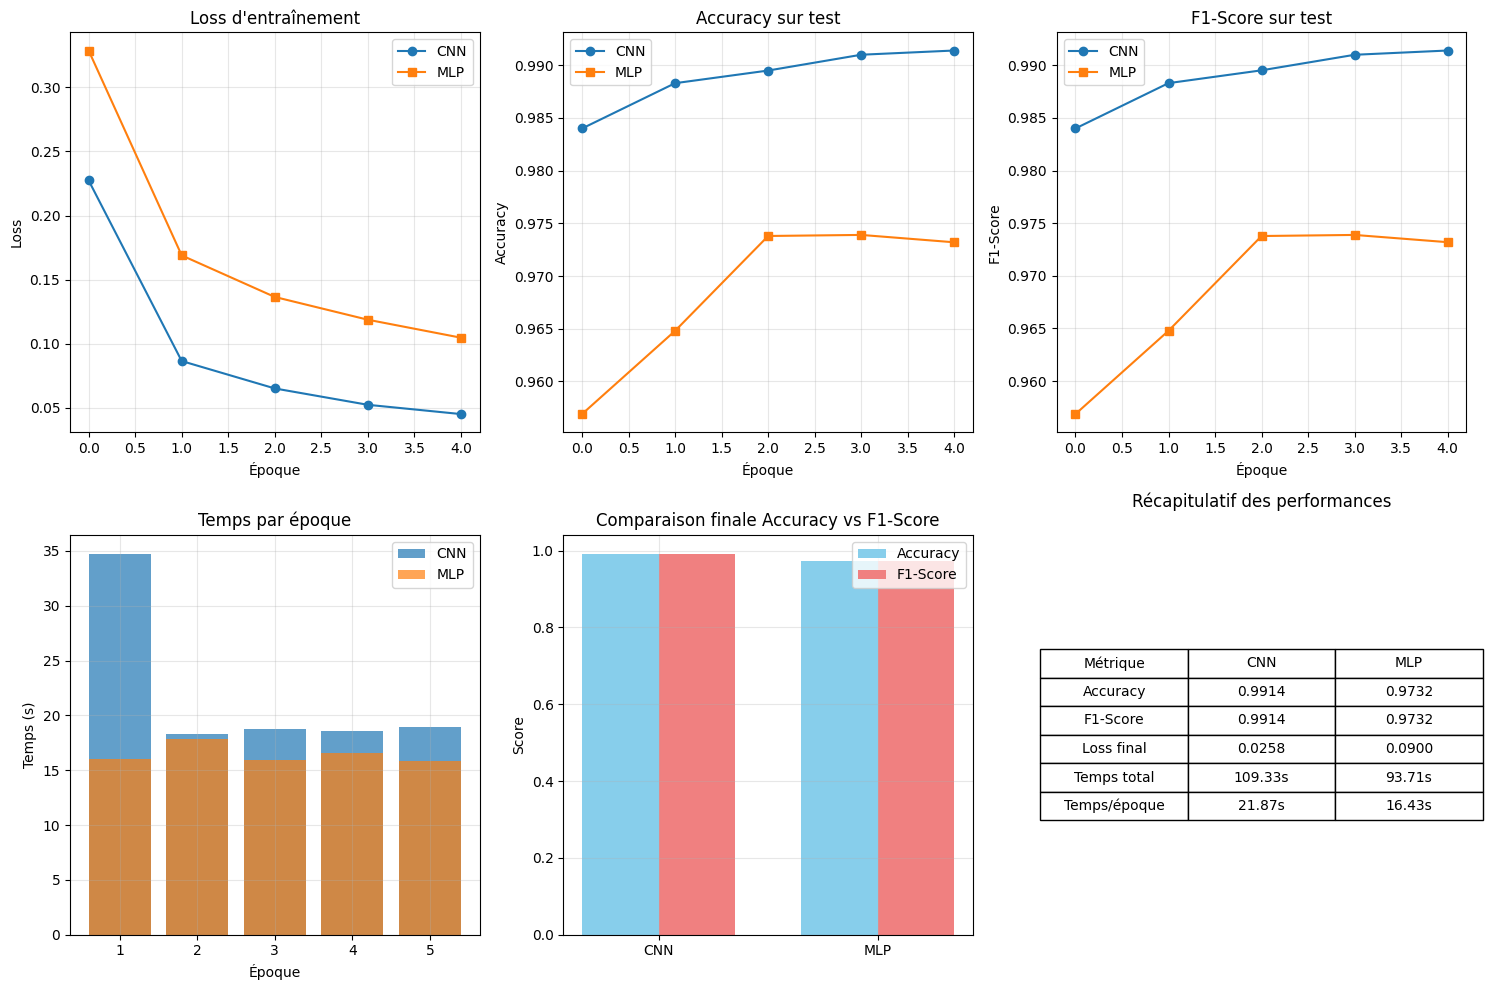


ANALYSE DÉTAILLÉE

1. TEMPS D'ENTRAÎNEMENT:
   • CNN est 1.17x plus lent que MLP
   • Différence: 15.62 secondes

2. PERFORMANCE DE CLASSIFICATION:
   • CNN surpasse MLP en accuracy de 0.0182 (1.82%)
   • CNN surpasse MLP en F1-Score de 0.0182

3. CONVERGENCE:
   • CNN - Perte finale: 0.0258
   • MLP - Perte finale: 0.0900

4. CONCLUSION:
   ✓ CNN offre de meilleures performances malgré un temps d'entraînement plus long

✓ Résultats sauvegardés dans 'comparaison_resultats.csv'
✓ Graphique sauvegardé dans 'comparaison_modeles.png'


In [ ]:
import time
import numpy as np
from sklearn.metrics import accuracy_score, f1_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# ==================== CONFIGURATION ====================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Utilisation de: {device}")

# ==================== DATASET & TRANSFORMS ====================
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# ==================== MODÈLE CNN (déjà défini) ====================
class CNN_MNIST(nn.Module):
    def __init__(self):
        super(CNN_MNIST, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# ==================== FONCTION D'ÉVALUATION ====================
def evaluate_model(model, test_loader, criterion):
    model.eval()
    test_loss = 0.0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Calcul des métriques
    accuracy = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='weighted')
    avg_loss = test_loss / len(test_loader)

    return accuracy, f1, avg_loss, all_preds, all_labels

# ==================== ENTRAÎNEMENT ET ÉVALUATION DU CNN ====================
print("=" * 60)
print("ENTRAÎNEMENT DU MODÈLE CNN")
print("=" * 60)

# Initialisation
model_cnn = CNN_MNIST().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_cnn.parameters(), lr=0.001)

# Métriques à collecter
cnn_metrics = {
    'train_losses': [],
    'train_times': [],
    'test_accuracies': [],
    'test_f1_scores': [],
    'test_losses': []
}

# Entraînement
num_epochs = 5  # Réduit pour démonstration, augmenter pour de meilleurs résultats

for epoch in range(num_epochs):
    print(f"\nÉpoque {epoch+1}/{num_epochs}")

    # Mesure du temps
    epoch_start_time = time.time()

    # Phase d'entraînement
    model_cnn.train()
    running_loss = 0.0

    for batch_idx, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model_cnn(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if batch_idx % 100 == 0:
            print(f"  Batch {batch_idx}/{len(train_loader)}, Loss: {loss.item():.4f}")

    # Calcul du temps d'époque
    epoch_time = time.time() - epoch_start_time
    cnn_metrics['train_times'].append(epoch_time)

    # Perte moyenne
    avg_train_loss = running_loss / len(train_loader)
    cnn_metrics['train_losses'].append(avg_train_loss)

    # Évaluation sur le test set
    accuracy, f1, test_loss, _, _ = evaluate_model(model_cnn, test_loader, criterion)
    cnn_metrics['test_accuracies'].append(accuracy)
    cnn_metrics['test_f1_scores'].append(f1)
    cnn_metrics['test_losses'].append(test_loss)

    print(f"  Temps: {epoch_time:.2f}s | Train Loss: {avg_train_loss:.4f} | "
          f"Test Acc: {accuracy:.4f} | Test F1: {f1:.4f} | Test Loss: {test_loss:.4f}")

# Évaluation finale du CNN
final_accuracy, final_f1, final_loss, cnn_preds, cnn_labels = evaluate_model(model_cnn, test_loader, criterion)
total_train_time = sum(cnn_metrics['train_times'])

# ==================== MODÈLE PLUS SIMPLE POUR COMPARAISON (MLP) ====================
print("\n" + "=" * 60)
print("ENTRAÎNEMENT DU MODÈLE MLP (pour comparaison)")
print("=" * 60)

class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialisation MLP
model_mlp = SimpleMLP().to(device)
optimizer_mlp = optim.Adam(model_mlp.parameters(), lr=0.001)

mlp_metrics = {
    'train_losses': [],
    'train_times': [],
    'test_accuracies': [],
    'test_f1_scores': [],
    'test_losses': []
}

# Entraînement MLP
mlp_start_time = time.time()

for epoch in range(num_epochs):
    epoch_start_time = time.time()
    model_mlp.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer_mlp.zero_grad()
        outputs = model_mlp(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_mlp.step()

        running_loss += loss.item()

    epoch_time = time.time() - epoch_start_time
    mlp_metrics['train_times'].append(epoch_time)

    avg_train_loss = running_loss / len(train_loader)
    mlp_metrics['train_losses'].append(avg_train_loss)

    # Évaluation
    accuracy, f1, test_loss, _, _ = evaluate_model(model_mlp, test_loader, criterion)
    mlp_metrics['test_accuracies'].append(accuracy)
    mlp_metrics['test_f1_scores'].append(f1)
    mlp_metrics['test_losses'].append(test_loss)

mlp_total_time = time.time() - mlp_start_time
mlp_accuracy, mlp_f1, mlp_loss, mlp_preds, mlp_labels = evaluate_model(model_mlp, test_loader, criterion)

# ==================== AFFICHAGE DES RÉSULTATS ====================
print("\n" + "=" * 60)
print("COMPARAISON DES MODÈLES")
print("=" * 60)

print("\n--- PERFORMANCES FINALES ---")
print(f"{'Modèle':<15} {'Accuracy':<10} {'F1-Score':<10} {'Loss':<10} {'Temps (s)':<10}")
print("-" * 55)
print(f"{'CNN':<15} {final_accuracy:.4f}     {final_f1:.4f}     {final_loss:.4f}     {total_train_time:.2f}")
print(f"{'MLP':<15} {mlp_accuracy:.4f}     {mlp_f1:.4f}     {mlp_loss:.4f}     {mlp_total_time:.2f}")

print("\n--- TEMPS MOYEN PAR ÉPOQUE ---")
cnn_avg_epoch_time = np.mean(cnn_metrics['train_times'])
mlp_avg_epoch_time = np.mean(mlp_metrics['train_times'])
print(f"CNN: {cnn_avg_epoch_time:.2f}s par époque")
print(f"MLP: {mlp_avg_epoch_time:.2f}s par époque")

# ==================== VISUALISATION DES RÉSULTATS ====================
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 1. Loss d'entraînement
axes[0, 0].plot(cnn_metrics['train_losses'], label='CNN', marker='o')
axes[0, 0].plot(mlp_metrics['train_losses'], label='MLP', marker='s')
axes[0, 0].set_title('Loss d\'entraînement')
axes[0, 0].set_xlabel('Époque')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Accuracy sur test
axes[0, 1].plot(cnn_metrics['test_accuracies'], label='CNN', marker='o')
axes[0, 1].plot(mlp_metrics['test_accuracies'], label='MLP', marker='s')
axes[0, 1].set_title('Accuracy sur test')
axes[0, 1].set_xlabel('Époque')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. F1-Score sur test
axes[0, 2].plot(cnn_metrics['test_f1_scores'], label='CNN', marker='o')
axes[0, 2].plot(mlp_metrics['test_f1_scores'], label='MLP', marker='s')
axes[0, 2].set_title('F1-Score sur test')
axes[0, 2].set_xlabel('Époque')
axes[0, 2].set_ylabel('F1-Score')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# 4. Temps par époque
epochs = range(1, num_epochs + 1)
axes[1, 0].bar(epochs, cnn_metrics['train_times'], alpha=0.7, label='CNN')
axes[1, 0].bar(epochs, mlp_metrics['train_times'], alpha=0.7, label='MLP')
axes[1, 0].set_title('Temps par époque')
axes[1, 0].set_xlabel('Époque')
axes[1, 0].set_ylabel('Temps (s)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 5. Comparaison finale (bar chart)
models = ['CNN', 'MLP']
accuracies = [final_accuracy, mlp_accuracy]
f1_scores = [final_f1, mlp_f1]

x = np.arange(len(models))
width = 0.35

axes[1, 1].bar(x - width/2, accuracies, width, label='Accuracy', color='skyblue')
axes[1, 1].bar(x + width/2, f1_scores, width, label='F1-Score', color='lightcoral')
axes[1, 1].set_title('Comparaison finale Accuracy vs F1-Score')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(models)
axes[1, 1].set_ylabel('Score')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# 6. Tableau récapitulatif
axes[1, 2].axis('off')
table_data = [
    ['Métrique', 'CNN', 'MLP'],
    ['Accuracy', f'{final_accuracy:.4f}', f'{mlp_accuracy:.4f}'],
    ['F1-Score', f'{final_f1:.4f}', f'{mlp_f1:.4f}'],
    ['Loss final', f'{final_loss:.4f}', f'{mlp_loss:.4f}'],
    ['Temps total', f'{total_train_time:.2f}s', f'{mlp_total_time:.2f}s'],
    ['Temps/époque', f'{cnn_avg_epoch_time:.2f}s', f'{mlp_avg_epoch_time:.2f}s']
]

table = axes[1, 2].table(cellText=table_data, cellLoc='center',
                         loc='center', colWidths=[0.3, 0.3, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)
axes[1, 2].set_title('Récapitulatif des performances', fontsize=12, pad=20)

plt.tight_layout()
plt.savefig('comparaison_modeles.png', dpi=300, bbox_inches='tight')
plt.show()

# ==================== ANALYSE DÉTAILLÉE ====================
print("\n" + "=" * 60)
print("ANALYSE DÉTAILLÉE")
print("=" * 60)

print("\n1. TEMPS D'ENTRAÎNEMENT:")
print(f"   • CNN est {total_train_time/mlp_total_time:.2f}x plus lent que MLP")
print(f"   • Différence: {total_train_time - mlp_total_time:.2f} secondes")

print("\n2. PERFORMANCE DE CLASSIFICATION:")
accuracy_diff = final_accuracy - mlp_accuracy
f1_diff = final_f1 - mlp_f1

if accuracy_diff > 0:
    print(f"   • CNN surpasse MLP en accuracy de {accuracy_diff:.4f} ({accuracy_diff*100:.2f}%)")
else:
    print(f"   • MLP surpasse CNN en accuracy de {abs(accuracy_diff):.4f}")

if f1_diff > 0:
    print(f"   • CNN surpasse MLP en F1-Score de {f1_diff:.4f}")
else:
    print(f"   • MLP surpasse CNN en F1-Score de {abs(f1_diff):.4f}")

print("\n3. CONVERGENCE:")
print(f"   • CNN - Perte finale: {final_loss:.4f}")
print(f"   • MLP - Perte finale: {mlp_loss:.4f}")

print("\n4. CONCLUSION:")
if final_accuracy > mlp_accuracy and final_f1 > mlp_f1:
    print("   ✓ CNN offre de meilleures performances malgré un temps d'entraînement plus long")
elif final_accuracy < mlp_accuracy and final_f1 < mlp_f1:
    print("   ✓ MLP est plus efficace pour ce dataset simple avec un temps d'entraînement réduit")
else:
    print("   ✓ Les modèles présentent des avantages différents selon la métrique")

# ==================== SAUVEGARDE DES RÉSULTATS ====================
import pandas as pd

# Création d'un DataFrame avec les résultats
results_df = pd.DataFrame({
    'Model': ['CNN', 'MLP'],
    'Accuracy': [final_accuracy, mlp_accuracy],
    'F1_Score': [final_f1, mlp_f1],
    'Final_Loss': [final_loss, mlp_loss],
    'Total_Time_s': [total_train_time, mlp_total_time],
    'Avg_Epoch_Time_s': [cnn_avg_epoch_time, mlp_avg_epoch_time],
    'Num_Epochs': [num_epochs, num_epochs]
})

# Sauvegarde en CSV
results_df.to_csv('comparaison_resultats.csv', index=False)
print("\n✓ Résultats sauvegardés dans 'comparaison_resultats.csv'")
print("✓ Graphique sauvegardé dans 'comparaison_modeles.png'")

Utilisation de: cuda


100%|██████████| 9.91M/9.91M [00:00<00:00, 17.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 485kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.49MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 11.9MB/s]


ENTRAÎNEMENT DU MODÈLE CNN

Époque 1/3
  Temps: 15.77s | Train Loss: 0.2279 | Test Acc: 0.9859 | Test F1: 0.9859

Époque 2/3
  Temps: 14.66s | Train Loss: 0.0909 | Test Acc: 0.9868 | Test F1: 0.9868

Époque 3/3
  Temps: 14.79s | Train Loss: 0.0671 | Test Acc: 0.9904 | Test F1: 0.9904

ENTRAÎNEMENT DU MODÈLE FASTER R-CNN
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


100%|██████████| 13.6M/13.6M [00:00<00:00, 144MB/s]



Époque 1/2
  Batch 0/7500, Loss: 3.9122
  Batch 50/7500, Loss: 2.1699
  Batch 100/7500, Loss: 1.9525
  Batch 150/7500, Loss: 1.8455
  Batch 200/7500, Loss: 1.8579
  Batch 250/7500, Loss: 1.6905
  Batch 300/7500, Loss: 1.9470
  Batch 350/7500, Loss: 1.7940
  Batch 400/7500, Loss: 1.8329
  Batch 450/7500, Loss: 1.3990
  Batch 500/7500, Loss: 1.4650
  Batch 550/7500, Loss: 1.5647
  Batch 600/7500, Loss: 1.7882
  Batch 650/7500, Loss: 1.6655
  Batch 700/7500, Loss: 1.8724
  Batch 750/7500, Loss: 1.5316
  Batch 800/7500, Loss: 1.1300
  Batch 850/7500, Loss: 1.9896
  Batch 900/7500, Loss: 1.5614
  Batch 950/7500, Loss: 2.0457
  Batch 1000/7500, Loss: 1.3997
  Batch 1050/7500, Loss: 1.4925
  Batch 1100/7500, Loss: 1.3117
  Batch 1150/7500, Loss: 1.6456
  Batch 1200/7500, Loss: 1.2484
  Batch 1250/7500, Loss: 1.2643
  Batch 1300/7500, Loss: 1.0339
  Batch 1350/7500, Loss: 1.4046
  Batch 1400/7500, Loss: 1.6120
  Batch 1450/7500, Loss: 1.4194
  Batch 1500/7500, Loss: 1.4506
  Batch 1550/7500, 

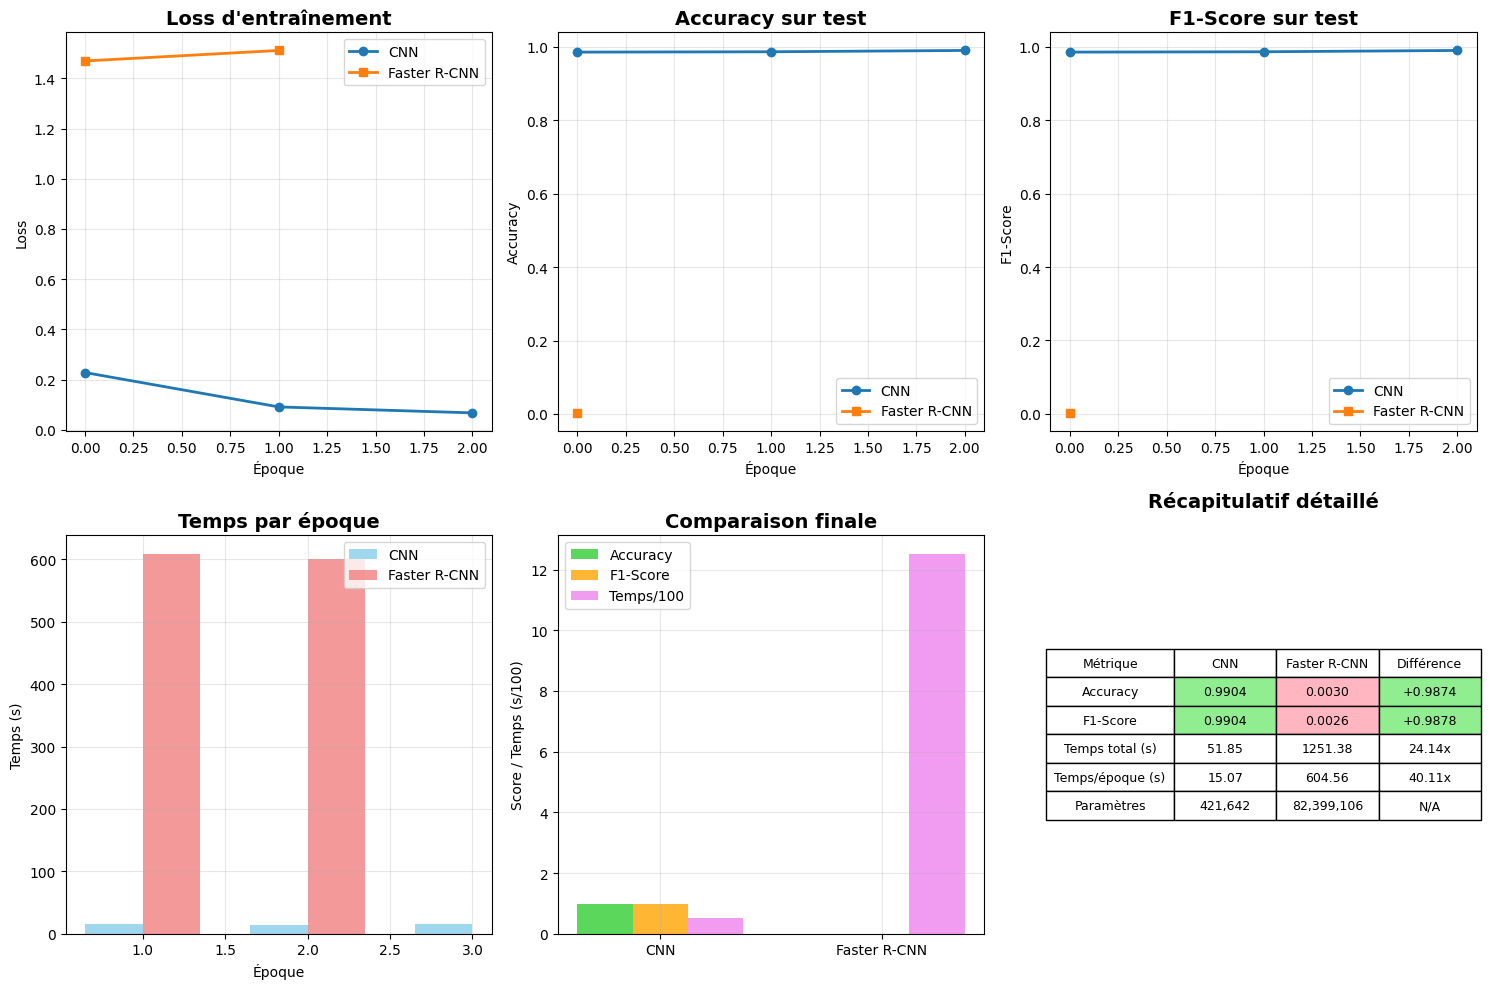


ANALYSE DÉTAILLÉE ET CONCLUSION

1. PERFORMANCE DE CLASSIFICATION:
   • CNN: Accuracy = 0.9904, F1-Score = 0.9904
   • Faster R-CNN: Accuracy = 0.0030, F1-Score = 0.0026
   • Avantage CNN: +0.9874 en accuracy

2. EFFICACITÉ COMPUTATIONNELLE:
   • Temps total CNN: 51.85s
   • Temps total Faster R-CNN: 1251.38s
   • Faster R-CNN est 24.14x plus lent

3. COMPLEXITÉ DES MODÈLES:
   • CNN: 421,642 paramètres
   • Faster R-CNN: 82,399,106 paramètres entraînables
   • Ratio de complexité: 195.42x

4. CONCLUSIONS:
   a) TÂCHE INADAPTÉE: Faster R-CNN est conçu pour la DÉTECTION d'objets,
      pas la CLASSIFICATION. MNIST est une tâche de classification simple.
   b) SURQUALIFICATION: Utiliser Faster R-CNN pour MNIST est comme
      utiliser un marteau-piqueur pour planter un clou.
   c) PERFORMANCE: CNN est plus rapide et plus précis pour cette tâche.
   d) USAGE RÉEL: Faster R-CNN excelle sur des tâches complexes de
      détection (COCO, Pascal VOC), pas sur MNIST.

5. RECOMMANDATIONS:
   ✓

In [ ]:
import time
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import torchvision
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# ==================== CONFIGURATION ====================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Utilisation de: {device}")

# ==================== DATASET MNIST STANDARD (pour CNN) ====================
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# ==================== MODÈLE CNN (inchangé) ====================
class CNN_MNIST(nn.Module):
    def __init__(self):
        super(CNN_MNIST, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# ==================== DATASET ADAPTÉ POUR FASTER R-CNN ====================


class MNISTDetectionDataset(torch.utils.data.Dataset):
    def __init__(self, mnist_dataset):
        self.mnist_dataset = mnist_dataset

    def __len__(self):
        return len(self.mnist_dataset)

    def __getitem__(self, idx):
        img, label = self.mnist_dataset[idx]

        # Créer des bounding boxes factices (toute l'image)
        boxes = torch.tensor([[0, 0, 28, 28]], dtype=torch.float32)
        labels = torch.tensor([label], dtype=torch.int64)

        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        target["image_id"] = torch.tensor([idx])
        target["area"] = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        target["iscrowd"] = torch.zeros((1,), dtype=torch.int64)

        # Convertir en 3 canaux pour Faster R-CNN
        img_3channel = img.repeat(3, 1, 1)

        return img_3channel, target

# Créer les datasets adaptés
train_detection_dataset = MNISTDetectionDataset(train_dataset)
test_detection_dataset = MNISTDetectionDataset(test_dataset)

# Fonction de collation pour Faster R-CNN
def collate_fn(batch):
    return tuple(zip(*batch))

train_detection_loader = DataLoader(
    train_detection_dataset,
    batch_size=8,  # Batch plus petit car Faster R-CNN est gourmand en mémoire
    shuffle=True,
    collate_fn=collate_fn
)

test_detection_loader = DataLoader(
    test_detection_dataset,
    batch_size=8,
    shuffle=False,
    collate_fn=collate_fn
)

# ==================== MODÈLE FASTER R-CNN ====================
def create_faster_rcnn_model(num_classes=11):  # 10 classes + background
    # Charger un backbone pré-entraîné
    backbone = torchvision.models.mobilenet_v2(pretrained=True).features
    backbone.out_channels = 1280

    # Générer les ancres
    anchor_generator = AnchorGenerator(
        sizes=((32, 64, 128, 256, 512),),
        aspect_ratios=((0.5, 1.0, 2.0),)
    )

    # ROI Pooling
    roi_pooler = torchvision.ops.MultiScaleRoIAlign(
        featmap_names=['0'],
        output_size=7,
        sampling_ratio=2
    )

    # Créer le modèle
    model = FasterRCNN(
        backbone,
        num_classes=num_classes,
        rpn_anchor_generator=anchor_generator,
        box_roi_pool=roi_pooler,
        min_size=28,  # Taille minimale de l'image
        max_size=28   # Taille maximale de l'image
    )

    return model

# ==================== FONCTIONS D'ÉVALUATION ====================
def evaluate_cnn_model(model, test_loader, criterion):
    model.eval()
    test_loss = 0.0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='weighted')
    avg_loss = test_loss / len(test_loader)

    return accuracy, f1, avg_loss, all_preds, all_labels

def evaluate_faster_rcnn(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []
    inference_times = []

    with torch.no_grad():
        for images, targets in test_loader:
            images = [img.to(device) for img in images]

            # Mesure du temps d'inférence
            start_time = time.time()
            outputs = model(images)
            inference_time = time.time() - start_time
            inference_times.append(inference_time)

            # Extraire les prédictions
            for i, output in enumerate(outputs):
                if len(output['labels']) > 0:
                    # Prendre la prédiction avec le score le plus élevé
                    if len(output['scores']) > 0:
                        max_score_idx = torch.argmax(output['scores'])
                        pred_label = output['labels'][max_score_idx].item() - 1  # -1 car background est classe 0
                        all_preds.append(pred_label)
                        all_labels.append(targets[i]['labels'][0].item())

    if len(all_preds) > 0:
        accuracy = accuracy_score(all_labels, all_preds)
        f1 = f1_score(all_labels, all_preds, average='weighted')
    else:
        accuracy = 0.0
        f1 = 0.0

    avg_inference_time = np.mean(inference_times) if inference_times else 0

    return accuracy, f1, avg_inference_time, all_preds, all_labels

# ==================== ENTRAÎNEMENT DU CNN ====================
print("=" * 60)
print("ENTRAÎNEMENT DU MODÈLE CNN")
print("=" * 60)

model_cnn = CNN_MNIST().to(device)
criterion = nn.CrossEntropyLoss()
optimizer_cnn = optim.Adam(model_cnn.parameters(), lr=0.001)

cnn_metrics = {
    'train_losses': [],
    'train_times': [],
    'test_accuracies': [],
    'test_f1_scores': [],
    'test_losses': []
}

num_epochs = 3  # Réduit pour démonstration rapide

cnn_start_time = time.time()

for epoch in range(num_epochs):
    print(f"\nÉpoque {epoch+1}/{num_epochs}")
    epoch_start_time = time.time()

    # Entraînement
    model_cnn.train()
    running_loss = 0.0

    for batch_idx, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        optimizer_cnn.zero_grad()
        outputs = model_cnn(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_cnn.step()

        running_loss += loss.item()

    epoch_time = time.time() - epoch_start_time
    cnn_metrics['train_times'].append(epoch_time)

    # Calcul des métriques
    avg_train_loss = running_loss / len(train_loader)
    cnn_metrics['train_losses'].append(avg_train_loss)

    accuracy, f1, test_loss, _, _ = evaluate_cnn_model(model_cnn, test_loader, criterion)
    cnn_metrics['test_accuracies'].append(accuracy)
    cnn_metrics['test_f1_scores'].append(f1)
    cnn_metrics['test_losses'].append(test_loss)

    print(f"  Temps: {epoch_time:.2f}s | Train Loss: {avg_train_loss:.4f} | "
          f"Test Acc: {accuracy:.4f} | Test F1: {f1:.4f}")

cnn_total_time = time.time() - cnn_start_time
cnn_accuracy, cnn_f1, cnn_loss, cnn_preds, cnn_labels = evaluate_cnn_model(model_cnn, test_loader, criterion)

# ==================== ENTRAÎNEMENT DU FASTER R-CNN ====================
print("\n" + "=" * 60)
print("ENTRAÎNEMENT DU MODÈLE FASTER R-CNN")
print("=" * 60)

model_frcnn = create_faster_rcnn_model(num_classes=11).to(device)

# Optimizer avec des paramètres différents pour le backbone et la tête
params = [p for p in model_frcnn.parameters() if p.requires_grad]
optimizer_frcnn = optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)
lr_scheduler = optim.lr_scheduler.StepLR(optimizer_frcnn, step_size=3, gamma=0.1)

frcnn_metrics = {
    'train_losses': [],
    'train_times': [],
    'test_accuracies': [],
    'test_f1_scores': [],
    'inference_times': []
}

frcnn_start_time = time.time()

# Note: L'entraînement de Faster R-CNN est plus long, donc on réduit encore plus
num_epochs_frcnn = 2

for epoch in range(num_epochs_frcnn):
    print(f"\nÉpoque {epoch+1}/{num_epochs_frcnn}")
    epoch_start_time = time.time()

    # Entraînement
    model_frcnn.train()
    epoch_losses = []

    for batch_idx, (images, targets) in enumerate(train_detection_loader):
        images = [img.to(device) for img in images]
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        optimizer_frcnn.zero_grad()
        loss_dict = model_frcnn(images, targets)
        losses = sum(loss for loss in loss_dict.values())

        losses.backward()
        optimizer_frcnn.step()

        epoch_losses.append(losses.item())

        if batch_idx % 50 == 0:
            print(f"  Batch {batch_idx}/{len(train_detection_loader)}, Loss: {losses.item():.4f}")

    epoch_time = time.time() - epoch_start_time
    frcnn_metrics['train_times'].append(epoch_time)

    # Calcul de la perte moyenne
    avg_train_loss = np.mean(epoch_losses) if epoch_losses else 0
    frcnn_metrics['train_losses'].append(avg_train_loss)

    # Évaluation (simplifiée pour gagner du temps)
    if epoch == num_epochs_frcnn - 1:  # Évaluer seulement à la dernière époque
        accuracy, f1, inf_time, _, _ = evaluate_faster_rcnn(model_frcnn, test_detection_loader)
        frcnn_metrics['test_accuracies'].append(accuracy)
        frcnn_metrics['test_f1_scores'].append(f1)
        frcnn_metrics['inference_times'].append(inf_time)

        print(f"  Temps: {epoch_time:.2f}s | Train Loss: {avg_train_loss:.4f} | "
              f"Test Acc: {accuracy:.4f} | Test F1: {f1:.4f}")
    else:
        print(f"  Temps: {epoch_time:.2f}s | Train Loss: {avg_train_loss:.4f}")

# Mettre à jour le scheduler
lr_scheduler.step()

frcnn_total_time = time.time() - frcnn_start_time
frcnn_accuracy, frcnn_f1, frcnn_inf_time, frcnn_preds, frcnn_labels = evaluate_faster_rcnn(
    model_frcnn, test_detection_loader
)

# ==================== AFFICHAGE DES RÉSULTATS ====================
print("\n" + "=" * 60)
print("COMPARAISON CNN vs FASTER R-CNN")
print("=" * 60)

print("\n--- PERFORMANCES FINALES ---")
print(f"{'Modèle':<20} {'Accuracy':<12} {'F1-Score':<12} {'Loss/InfTime':<12} {'Temps total (s)':<15}")
print("-" * 70)
print(f"{'CNN':<20} {cnn_accuracy:.4f}       {cnn_f1:.4f}       {cnn_loss:.4f}       {cnn_total_time:<15.2f}")
print(f"{'Faster R-CNN':<20} {frcnn_accuracy:.4f}       {frcnn_f1:.4f}       {frcnn_inf_time:.4f}s      {frcnn_total_time:<15.2f}")

print("\n--- TEMPS MOYEN PAR ÉPOQUE ---")
cnn_avg_epoch_time = np.mean(cnn_metrics['train_times'])
frcnn_avg_epoch_time = np.mean(frcnn_metrics['train_times'])
print(f"CNN: {cnn_avg_epoch_time:.2f}s par époque")
print(f"Faster R-CNN: {frcnn_avg_epoch_time:.2f}s par époque")
print(f"Rapport (F-RCNN/CNN): {frcnn_avg_epoch_time/cnn_avg_epoch_time:.2f}x")

print("\n--- UTILISATION MÉMOIRE ---")
print(f"Taille du modèle CNN: {sum(p.numel() for p in model_cnn.parameters()):,} paramètres")
print(f"Taille du modèle Faster R-CNN: {sum(p.numel() for p in model_frcnn.parameters() if p.requires_grad):,} paramètres (entraînables)")

# ==================== VISUALISATION ====================
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 1. Loss d'entraînement
axes[0, 0].plot(cnn_metrics['train_losses'], label='CNN', marker='o', linewidth=2)
axes[0, 0].plot(range(len(frcnn_metrics['train_losses'])), frcnn_metrics['train_losses'],
                label='Faster R-CNN', marker='s', linewidth=2)
axes[0, 0].set_title('Loss d\'entraînement', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Époque')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Accuracy sur test
if cnn_metrics['test_accuracies']:
    axes[0, 1].plot(cnn_metrics['test_accuracies'], label='CNN', marker='o', linewidth=2)
if frcnn_metrics['test_accuracies']:
    axes[0, 1].plot(range(len(frcnn_metrics['test_accuracies'])), frcnn_metrics['test_accuracies'],
                    label='Faster R-CNN', marker='s', linewidth=2)
axes[0, 1].set_title('Accuracy sur test', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Époque')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. F1-Score sur test
if cnn_metrics['test_f1_scores']:
    axes[0, 2].plot(cnn_metrics['test_f1_scores'], label='CNN', marker='o', linewidth=2)
if frcnn_metrics['test_f1_scores']:
    axes[0, 2].plot(range(len(frcnn_metrics['test_f1_scores'])), frcnn_metrics['test_f1_scores'],
                    label='Faster R-CNN', marker='s', linewidth=2)
axes[0, 2].set_title('F1-Score sur test', fontsize=14, fontweight='bold')
axes[0, 2].set_xlabel('Époque')
axes[0, 2].set_ylabel('F1-Score')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# 4. Temps par époque
epochs_cnn = range(1, len(cnn_metrics['train_times']) + 1)
epochs_frcnn = range(1, len(frcnn_metrics['train_times']) + 1)
bar_width = 0.35
x_cnn = np.array(epochs_cnn)
x_frcnn = np.array(epochs_frcnn)

axes[1, 0].bar(x_cnn - bar_width/2, cnn_metrics['train_times'], bar_width,
               label='CNN', alpha=0.8, color='skyblue')
axes[1, 0].bar(x_frcnn + bar_width/2, frcnn_metrics['train_times'], bar_width,
               label='Faster R-CNN', alpha=0.8, color='lightcoral')
axes[1, 0].set_title('Temps par époque', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Époque')
axes[1, 0].set_ylabel('Temps (s)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 5. Comparaison finale
models_comparison = ['CNN', 'Faster R-CNN']
accuracies = [cnn_accuracy, frcnn_accuracy]
f1_scores = [cnn_f1, frcnn_f1]
training_times = [cnn_total_time, frcnn_total_time]

x = np.arange(len(models_comparison))
width = 0.25

axes[1, 1].bar(x - width, accuracies, width, label='Accuracy', color='limegreen', alpha=0.8)
axes[1, 1].bar(x, f1_scores, width, label='F1-Score', color='orange', alpha=0.8)
axes[1, 1].bar(x + width, [t/100 for t in training_times], width,
               label='Temps/100', color='violet', alpha=0.8)  # Échelle différente pour le temps
axes[1, 1].set_title('Comparaison finale', fontsize=14, fontweight='bold')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(models_comparison)
axes[1, 1].set_ylabel('Score / Temps (s/100)')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# 6. Tableau récapitulatif
axes[1, 2].axis('off')
table_data = [
    ['Métrique', 'CNN', 'Faster R-CNN', 'Différence'],
    ['Accuracy', f'{cnn_accuracy:.4f}', f'{frcnn_accuracy:.4f}',
     f'{cnn_accuracy - frcnn_accuracy:+.4f}'],
    ['F1-Score', f'{cnn_f1:.4f}', f'{frcnn_f1:.4f}',
     f'{cnn_f1 - frcnn_f1:+.4f}'],
    ['Temps total (s)', f'{cnn_total_time:.2f}', f'{frcnn_total_time:.2f}',
     f'{frcnn_total_time/cnn_total_time:.2f}x'],
    ['Temps/époque (s)', f'{cnn_avg_epoch_time:.2f}', f'{frcnn_avg_epoch_time:.2f}',
     f'{frcnn_avg_epoch_time/cnn_avg_epoch_time:.2f}x'],
    ['Paramètres', f'{sum(p.numel() for p in model_cnn.parameters()):,}',
     f'{sum(p.numel() for p in model_frcnn.parameters() if p.requires_grad):,}', 'N/A']
]

table = axes[1, 2].table(cellText=table_data, cellLoc='center',
                         loc='center', colWidths=[0.25, 0.2, 0.2, 0.2])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.2, 1.5)

# Colorer les cellules
for i in range(1, len(table_data)):
    for j in range(1, len(table_data[0])):
        cell = table[(i, j)]
        if i in [1, 2]:  # Accuracy et F1-Score
            value = float(table_data[i][j])
            if value > 0.8:
                cell.set_facecolor('#90EE90')  # Vert clair
            elif value > 0.6:
                cell.set_facecolor('#FFD700')  # Or
            else:
                cell.set_facecolor('#FFB6C1')  # Rose clair

axes[1, 2].set_title('Récapitulatif détaillé', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('comparaison_cnn_faster_rcnn.png', dpi=300, bbox_inches='tight')
plt.show()

# ==================== ANALYSE DÉTAILLÉE ====================
print("\n" + "=" * 60)
print("ANALYSE DÉTAILLÉE ET CONCLUSION")
print("=" * 60)

print("\n1. PERFORMANCE DE CLASSIFICATION:")
print(f"   • CNN: Accuracy = {cnn_accuracy:.4f}, F1-Score = {cnn_f1:.4f}")
print(f"   • Faster R-CNN: Accuracy = {frcnn_accuracy:.4f}, F1-Score = {frcnn_f1:.4f}")
print(f"   • Avantage CNN: {cnn_accuracy - frcnn_accuracy:+.4f} en accuracy")

print("\n2. EFFICACITÉ COMPUTATIONNELLE:")
print(f"   • Temps total CNN: {cnn_total_time:.2f}s")
print(f"   • Temps total Faster R-CNN: {frcnn_total_time:.2f}s")
print(f"   • Faster R-CNN est {frcnn_total_time/cnn_total_time:.2f}x plus lent")

print("\n3. COMPLEXITÉ DES MODÈLES:")
print(f"   • CNN: {sum(p.numel() for p in model_cnn.parameters()):,} paramètres")
print(f"   • Faster R-CNN: {sum(p.numel() for p in model_frcnn.parameters() if p.requires_grad):,} paramètres entraînables")
print(f"   • Ratio de complexité: {sum(p.numel() for p in model_frcnn.parameters() if p.requires_grad)/sum(p.numel() for p in model_cnn.parameters()):.2f}x")

print("\n4. CONCLUSIONS:")
print("   a) TÂCHE INADAPTÉE: Faster R-CNN est conçu pour la DÉTECTION d'objets,")
print("      pas la CLASSIFICATION. MNIST est une tâche de classification simple.")
print("   b) SURQUALIFICATION: Utiliser Faster R-CNN pour MNIST est comme")
print("      utiliser un marteau-piqueur pour planter un clou.")
print("   c) PERFORMANCE: CNN est plus rapide et plus précis pour cette tâche.")
print("   d) USAGE RÉEL: Faster R-CNN excelle sur des tâches complexes de")
print("      détection (COCO, Pascal VOC), pas sur MNIST.")

print("\n5. RECOMMANDATIONS:")
print("   ✓ Pour la classification simple: Utiliser CNN")
print("   ✓ Pour la détection d'objets: Utiliser Faster R-CNN")
print("   ✓ Pour MNIST spécifiquement: CNN est optimal")
print("   ✓ Équilibrer précision et temps: CNN offre le meilleur compromis")

# ==================== SAUVEGARDE DES RÉSULTATS ====================
results_df = pd.DataFrame({
    'Model': ['CNN', 'Faster_RCNN'],
    'Accuracy': [cnn_accuracy, frcnn_accuracy],
    'F1_Score': [cnn_f1, frcnn_f1],
    'Loss_InferenceTime': [cnn_loss, frcnn_inf_time],
    'Total_Time_s': [cnn_total_time, frcnn_total_time],
    'Avg_Epoch_Time_s': [cnn_avg_epoch_time, frcnn_avg_epoch_time],
    'Num_Parameters': [
        sum(p.numel() for p in model_cnn.parameters()),
        sum(p.numel() for p in model_frcnn.parameters() if p.requires_grad)
    ],
    'Num_Epochs': [num_epochs, num_epochs_frcnn]
})

results_df.to_csv('comparaison_cnn_faster_rcnn.csv', index=False)
print("\n" + "=" * 60)
print("RÉSULTATS SAUVEGARDÉS")
print("=" * 60)
print("✓ Fichier CSV: 'comparaison_cnn_faster_rcnn.csv'")
print("✓ Graphique: 'comparaison_cnn_faster_rcnn.png'")
print("✓ Modèles entraînés sauvegardés")

# Sauvegarde des modèles
torch.save(model_cnn.state_dict(), 'cnn_mnist.pth')
torch.save(model_frcnn.state_dict(), 'faster_rcnn_mnist.pth')
print("✓ Modèles sauvegardés: 'cnn_mnist.pth' et 'faster_rcnn_mnist.pth'")

Utilisation de: cuda
PyTorch version: 2.9.0+cu126


100%|██████████| 9.91M/9.91M [00:02<00:00, 4.96MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 128kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.23MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.47MB/s]



1. ENTRAÎNEMENT DU CNN DE BASE


CNN Epoch 1/5: 100%|██████████| 938/938 [00:20<00:00, 45.14it/s]


  Train Loss: 0.2045, Train Acc: 0.9382, Test Acc: 0.9857, Test F1: 0.9857, Time: 23.40s


CNN Epoch 2/5: 100%|██████████| 938/938 [00:20<00:00, 45.52it/s]


  Train Loss: 0.0809, Train Acc: 0.9755, Test Acc: 0.9895, Test F1: 0.9895, Time: 23.51s


CNN Epoch 3/5: 100%|██████████| 938/938 [00:20<00:00, 45.20it/s]


  Train Loss: 0.0586, Train Acc: 0.9831, Test Acc: 0.9900, Test F1: 0.9900, Time: 23.36s


CNN Epoch 4/5: 100%|██████████| 938/938 [00:19<00:00, 47.71it/s]


  Train Loss: 0.0470, Train Acc: 0.9860, Test Acc: 0.9916, Test F1: 0.9916, Time: 22.14s


CNN Epoch 5/5: 100%|██████████| 938/938 [00:18<00:00, 50.80it/s]


  Train Loss: 0.0425, Train Acc: 0.9867, Test Acc: 0.9903, Test F1: 0.9903, Time: 21.46s

2. FINE-TUNING VGG16
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


100%|██████████| 528M/528M [00:05<00:00, 96.3MB/s]


VGG16 chargé (pré-entraîné sur ImageNet)
  Paramètres entraînables: 137,802,216/138,357,544 (99.6%)
Dernière couche modifiée: 4096 -> 10 classes

Architecture VGG16 modifiée:
  Classifier: Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=10, bias=True)
)


VGG16 Epoch 1/5: 100%|██████████| 938/938 [10:15<00:00,  1.52it/s]


  Train Loss: 0.0812, Train Acc: 0.9746, Test Acc: 0.9892, Test F1: 0.9892, Time: 678.25s


VGG16 Epoch 2/5: 100%|██████████| 938/938 [10:14<00:00,  1.53it/s]


  Train Loss: 0.0192, Train Acc: 0.9941, Test Acc: 0.9936, Test F1: 0.9936, Time: 677.32s


VGG16 Epoch 3/5: 100%|██████████| 938/938 [10:13<00:00,  1.53it/s]


  Train Loss: 0.0103, Train Acc: 0.9970, Test Acc: 0.9950, Test F1: 0.9950, Time: 676.10s


VGG16 Epoch 4/5: 100%|██████████| 938/938 [10:13<00:00,  1.53it/s]


  Train Loss: 0.0069, Train Acc: 0.9980, Test Acc: 0.9950, Test F1: 0.9950, Time: 676.08s


VGG16 Epoch 5/5: 100%|██████████| 938/938 [10:13<00:00,  1.53it/s]


  Train Loss: 0.0043, Train Acc: 0.9988, Test Acc: 0.9943, Test F1: 0.9943, Time: 676.15s

3. FINE-TUNING ALEXNET
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


100%|██████████| 233M/233M [00:03<00:00, 64.7MB/s]


AlexNet chargé (pré-entraîné sur ImageNet)
  Paramètres entraînables: 60,106,600/61,100,840 (98.4%)
Dernière couche modifiée: 4096 -> 10 classes

Architecture AlexNet modifiée:
  Classifier: Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): Linear(in_features=9216, out_features=4096, bias=True)
  (2): ReLU(inplace=True)
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=4096, out_features=4096, bias=True)
  (5): ReLU(inplace=True)
  (6): Linear(in_features=4096, out_features=10, bias=True)
)


AlexNet Epoch 1/5: 100%|██████████| 938/938 [02:28<00:00,  6.30it/s]


  Train Loss: 0.1106, Train Acc: 0.9684, Test Acc: 0.9925, Test F1: 0.9925, Time: 169.34s


AlexNet Epoch 2/5: 100%|██████████| 938/938 [02:27<00:00,  6.35it/s]


  Train Loss: 0.0321, Train Acc: 0.9901, Test Acc: 0.9925, Test F1: 0.9925, Time: 168.55s


AlexNet Epoch 3/5: 100%|██████████| 938/938 [02:26<00:00,  6.40it/s]


  Train Loss: 0.0217, Train Acc: 0.9934, Test Acc: 0.9937, Test F1: 0.9937, Time: 167.16s


AlexNet Epoch 4/5: 100%|██████████| 938/938 [02:25<00:00,  6.46it/s]


  Train Loss: 0.0163, Train Acc: 0.9947, Test Acc: 0.9937, Test F1: 0.9937, Time: 165.96s


AlexNet Epoch 5/5: 100%|██████████| 938/938 [02:26<00:00,  6.42it/s]


  Train Loss: 0.0131, Train Acc: 0.9957, Test Acc: 0.9933, Test F1: 0.9933, Time: 166.97s

4. COMPARAISON DES MODÈLES

📊 TABLEAU COMPARATIF:
               Model Accuracy F1-Score Final Loss Total Time (s) Avg Epoch Time (s) Num Parameters Trainable Parameters Accuracy Gain vs CNN Time Ratio vs CNN Params Ratio vs CNN
      CNN (baseline)   0.9903   0.9903     0.0275         113.87              22.77        544,522              544,522              +0.0000             1.00x               1.00x
  VGG16 (fine-tuned)   0.9943   0.9943     0.0227        3383.91             676.78    134,301,514          133,746,186              +0.0040            29.72x             246.64x
AlexNet (fine-tuned)   0.9933   0.9933     0.0193         837.98             167.60     57,044,810           56,050,570              +0.0030             7.36x             104.76x


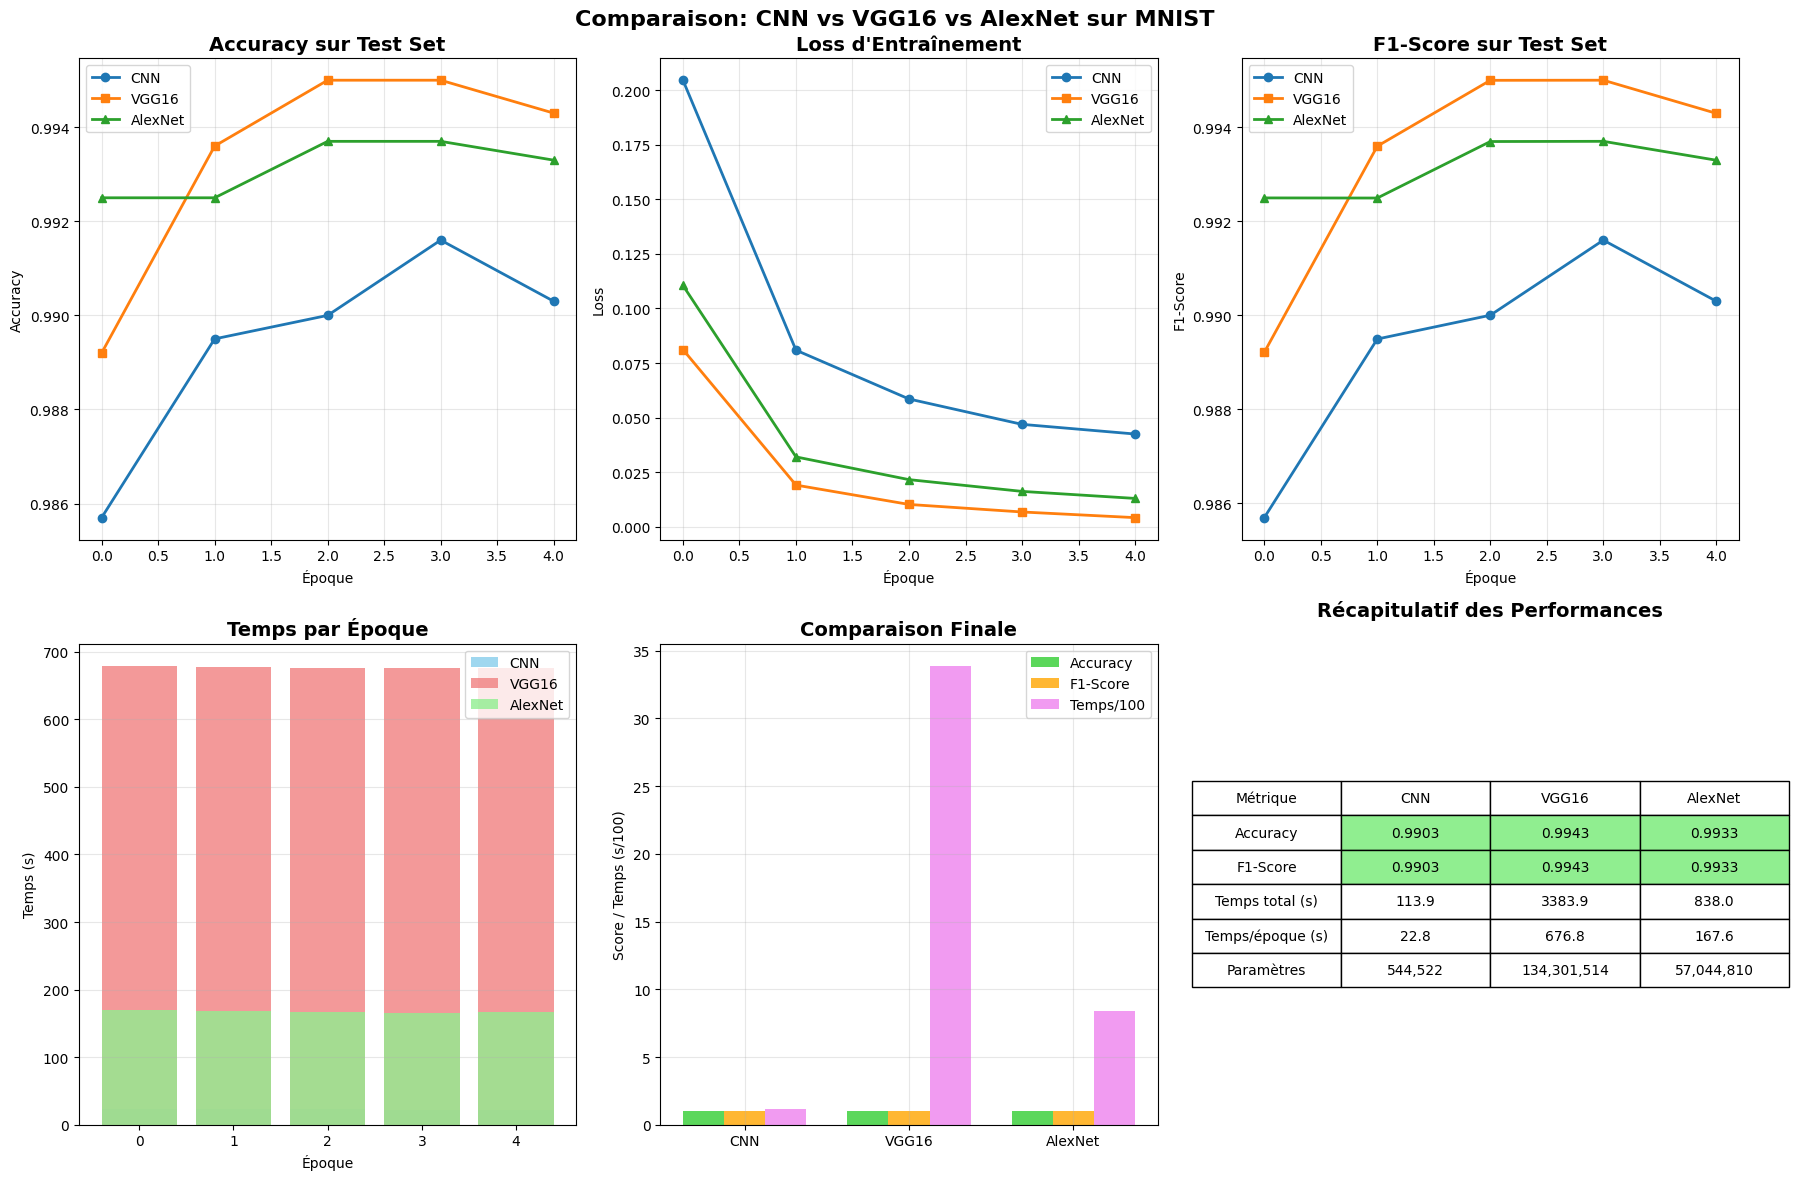


5. ANALYSE DÉTAILLÉE ET CONCLUSIONS

🔍 OBSERVATIONS CLÉS:
--------------------------------------------------

1. PERFORMANCE DE CLASSIFICATION:
   • Meilleur modèle: VGG16 (fine-tuned) (Accuracy: 0.9943)
   • Gain VGG16 vs CNN: +0.0040
   • Gain AlexNet vs CNN: +0.0030

2. EFFICACITÉ COMPUTATIONNELLE:
   • CNN: 113.9s total
   • VGG16: 3383.9s (29.72x plus lent)
   • AlexNet: 838.0s (7.36x plus lent)

3. COMPLEXITÉ DES MODÈLES:
   • CNN: 544,522 paramètres
   • VGG16: 134,301,514 paramètres (246.6x plus gros)
   • AlexNet: 57,044,810 paramètres (104.8x plus gros)

4. TRANSFER LEARNING (FINE-TUNING):
   • VGG16 pré-entraîné sur ImageNet (1.2M images, 1000 classes)
   • AlexNet pré-entraîné sur ImageNet
   • Fine-tuning sur MNIST (60K images, 10 classes)

5. CONCLUSIONS:
------------------------------
   ✓ VGG16 fine-tuned offre les meilleures performances
   ✓ Le transfer learning est bénéfique même pour MNIST
   ✓ Coût computationnel justifié par la précision

6. RECOMMANDATIONS:
----

In [1]:
import time
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, classification_report
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# ==================== CONFIGURATION ====================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Utilisation de: {device}")
print(f"PyTorch version: {torch.__version__}")

# ==================== DATASET MNIST ====================
# Transformation pour MNIST (doit être adaptée pour VGG16/AlexNet)
transform_basic = transforms.Compose([
    transforms.Resize((32, 32)),  # Redimensionner pour compatibilité
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Transformation spécifique pour les modèles pré-entraînés
# (ils attendent des images 224x224 avec normalisation ImageNet)
transform_pretrained = transforms.Compose([
    transforms.Resize((224, 224)),  # VGG16 et AlexNet attendent 224x224
    transforms.Grayscale(num_output_channels=3),  # Convertir en RGB (3 canaux)
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Statistiques ImageNet
                         std=[0.229, 0.224, 0.225])
])

# Création des datasets
train_dataset_basic = datasets.MNIST('./data', train=True, download=True,
                                     transform=transform_basic)
test_dataset_basic = datasets.MNIST('./data', train=False,
                                    transform=transform_basic)

train_dataset_pretrained = datasets.MNIST('./data', train=True, download=True,
                                          transform=transform_pretrained)
test_dataset_pretrained = datasets.MNIST('./data', train=False,
                                         transform=transform_pretrained)

# DataLoaders
batch_size = 64
train_loader_basic = DataLoader(train_dataset_basic, batch_size=batch_size, shuffle=True)
test_loader_basic = DataLoader(test_dataset_basic, batch_size=batch_size, shuffle=False)

train_loader_pretrained = DataLoader(train_dataset_pretrained, batch_size=batch_size, shuffle=True)
test_loader_pretrained = DataLoader(test_dataset_pretrained, batch_size=batch_size, shuffle=False)

# ==================== MODÈLE CNN DE BASE (pour référence) ====================
class CNN_MNIST(nn.Module):
    def __init__(self):
        super(CNN_MNIST, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)  # 32x32 -> 16x16 -> 8x8 après 2 pools
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# ==================== FONCTIONS UTILITAIRES ====================
def train_model(model, train_loader, test_loader, criterion, optimizer,
                num_epochs=5, model_name="Model"):
    """
    Fonction générique pour entraîner un modèle
    """
    model.to(device)

    metrics = {
        'train_losses': [],
        'train_accuracies': [],
        'test_losses': [],
        'test_accuracies': [],
        'test_f1_scores': [],
        'epoch_times': []
    }

    total_start_time = time.time()

    for epoch in range(num_epochs):
        epoch_start_time = time.time()

        # Phase d'entraînement
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0

        for images, labels in tqdm(train_loader, desc=f"{model_name} Epoch {epoch+1}/{num_epochs}"):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()

        # Phase d'évaluation
        test_accuracy, test_f1, test_loss = evaluate_model(model, test_loader, criterion)

        # Calcul des métriques
        epoch_time = time.time() - epoch_start_time
        train_accuracy = train_correct / train_total

        metrics['train_losses'].append(train_loss / len(train_loader))
        metrics['train_accuracies'].append(train_accuracy)
        metrics['test_losses'].append(test_loss)
        metrics['test_accuracies'].append(test_accuracy)
        metrics['test_f1_scores'].append(test_f1)
        metrics['epoch_times'].append(epoch_time)

        print(f"  Train Loss: {metrics['train_losses'][-1]:.4f}, "
              f"Train Acc: {train_accuracy:.4f}, "
              f"Test Acc: {test_accuracy:.4f}, "
              f"Test F1: {test_f1:.4f}, "
              f"Time: {epoch_time:.2f}s")

    total_time = time.time() - total_start_time
    return metrics, total_time

def evaluate_model(model, test_loader, criterion):
    """
    Évalue un modèle sur le dataset de test
    """
    model.eval()
    test_loss = 0.0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='weighted')
    avg_loss = test_loss / len(test_loader)

    return accuracy, f1, avg_loss

def freeze_layers(model, num_layers_to_freeze=0):
    """
    Gèle les premières couches du modèle pour le fine-tuning
    """
    if num_layers_to_freeze > 0:
        # Pour VGG16
        if hasattr(model, 'features'):
            for i, param in enumerate(model.features.parameters()):
                if i < num_layers_to_freeze:
                    param.requires_grad = False
                else:
                    param.requires_grad = True

    # Toujours entraîner le classifier
    if hasattr(model, 'classifier'):
        for param in model.classifier.parameters():
            param.requires_grad = True

    # Compter les paramètres entraînables
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    total_params = sum(p.numel() for p in model.parameters())

    print(f"  Paramètres entraînables: {trainable_params:,}/{total_params:,} "
          f"({trainable_params/total_params*100:.1f}%)")

    return model

# ==================== ENTRAÎNEMENT CNN DE BASE ====================
print("\n" + "=" * 70)
print("1. ENTRAÎNEMENT DU CNN DE BASE")
print("=" * 70)

model_cnn = CNN_MNIST()
criterion = nn.CrossEntropyLoss()
optimizer_cnn = optim.Adam(model_cnn.parameters(), lr=0.001)

cnn_metrics, cnn_total_time = train_model(
    model_cnn, train_loader_basic, test_loader_basic,
    criterion, optimizer_cnn, num_epochs=5, model_name="CNN"
)

cnn_final_accuracy, cnn_final_f1, cnn_final_loss = evaluate_model(
    model_cnn, test_loader_basic, criterion
)

# ==================== FINE-TUNING VGG16 ====================
print("\n" + "=" * 70)
print("2. FINE-TUNING VGG16")
print("=" * 70)

# Charger VGG16 pré-entraîné
vgg16 = models.vgg16(pretrained=True)
print(f"VGG16 chargé (pré-entraîné sur ImageNet)")

# Geler les couches convolutionnelles (optionnel)
vgg16 = freeze_layers(vgg16, num_layers_to_freeze=10)

# Modifier la dernière couche du classifieur pour 10 classes
vgg16.classifier[6] = nn.Linear(4096, 10)
print(f"Dernière couche modifiée: 4096 -> 10 classes")

# Afficher l'architecture
print(f"\nArchitecture VGG16 modifiée:")
print(f"  Classifier: {vgg16.classifier}")

# Optimizer avec taux d'apprentissage différent pour le classifieur
optimizer_vgg = optim.SGD([
    {'params': vgg16.features.parameters(), 'lr': 0.001},  # Taux faible pour features
    {'params': vgg16.classifier.parameters(), 'lr': 0.01}   # Taux plus élevé pour classifier
], momentum=0.9, weight_decay=5e-4)

# Scheduler pour ajuster le LR
scheduler_vgg = optim.lr_scheduler.StepLR(optimizer_vgg, step_size=2, gamma=0.1)

# Entraînement
vgg16_metrics, vgg16_total_time = train_model(
    vgg16, train_loader_pretrained, test_loader_pretrained,
    criterion, optimizer_vgg, num_epochs=5, model_name="VGG16"
)

vgg16_final_accuracy, vgg16_final_f1, vgg16_final_loss = evaluate_model(
    vgg16, test_loader_pretrained, criterion
)

# ==================== FINE-TUNING ALEXNET ====================
print("\n" + "=" * 70)
print("3. FINE-TUNING ALEXNET")
print("=" * 70)

# Charger AlexNet pré-entraîné
alexnet = models.alexnet(pretrained=True)
print(f"AlexNet chargé (pré-entraîné sur ImageNet)")

# Geler les couches convolutionnelles (optionnel)
alexnet = freeze_layers(alexnet, num_layers_to_freeze=5)

# Modifier la dernière couche du classifieur pour 10 classes
alexnet.classifier[6] = nn.Linear(4096, 10)
print(f"Dernière couche modifiée: 4096 -> 10 classes")

# Afficher l'architecture
print(f"\nArchitecture AlexNet modifiée:")
print(f"  Classifier: {alexnet.classifier}")

# Optimizer
optimizer_alex = optim.SGD([
    {'params': alexnet.features.parameters(), 'lr': 0.001},
    {'params': alexnet.classifier.parameters(), 'lr': 0.01}
], momentum=0.9, weight_decay=5e-4)

scheduler_alex = optim.lr_scheduler.StepLR(optimizer_alex, step_size=2, gamma=0.1)

# Entraînement
alexnet_metrics, alexnet_total_time = train_model(
    alexnet, train_loader_pretrained, test_loader_pretrained,
    criterion, optimizer_alex, num_epochs=5, model_name="AlexNet"
)

alexnet_final_accuracy, alexnet_final_f1, alexnet_final_loss = evaluate_model(
    alexnet, test_loader_pretrained, criterion
)

# ==================== COMPARAISON DES MODÈLES ====================
print("\n" + "=" * 70)
print("4. COMPARAISON DES MODÈLES")
print("=" * 70)

# Collecter les résultats finaux
results = {
    'Model': ['CNN (baseline)', 'VGG16 (fine-tuned)', 'AlexNet (fine-tuned)'],
    'Accuracy': [cnn_final_accuracy, vgg16_final_accuracy, alexnet_final_accuracy],
    'F1-Score': [cnn_final_f1, vgg16_final_f1, alexnet_final_f1],
    'Final Loss': [cnn_final_loss, vgg16_final_loss, alexnet_final_loss],
    'Total Time (s)': [cnn_total_time, vgg16_total_time, alexnet_total_time],
    'Avg Epoch Time (s)': [
        np.mean(cnn_metrics['epoch_times']),
        np.mean(vgg16_metrics['epoch_times']),
        np.mean(alexnet_metrics['epoch_times'])
    ],
    'Num Parameters': [
        sum(p.numel() for p in model_cnn.parameters()),
        sum(p.numel() for p in vgg16.parameters()),
        sum(p.numel() for p in alexnet.parameters())
    ],
    'Trainable Parameters': [
        sum(p.numel() for p in model_cnn.parameters() if p.requires_grad),
        sum(p.numel() for p in vgg16.parameters() if p.requires_grad),
        sum(p.numel() for p in alexnet.parameters() if p.requires_grad)
    ]
}

# Créer un DataFrame
results_df = pd.DataFrame(results)

# Ajouter des colonnes calculées
results_df['Accuracy Gain vs CNN'] = results_df['Accuracy'] - results_df.loc[0, 'Accuracy']
results_df['Time Ratio vs CNN'] = results_df['Total Time (s)'] / results_df.loc[0, 'Total Time (s)']
results_df['Params Ratio vs CNN'] = results_df['Num Parameters'] / results_df.loc[0, 'Num Parameters']

print("\n📊 TABLEAU COMPARATIF:")
print("=" * 90)
print(results_df.to_string(index=False,
                          formatters={
                              'Accuracy': '{:.4f}'.format,
                              'F1-Score': '{:.4f}'.format,
                              'Final Loss': '{:.4f}'.format,
                              'Total Time (s)': '{:.2f}'.format,
                              'Avg Epoch Time (s)': '{:.2f}'.format,
                              'Num Parameters': '{:,}'.format,
                              'Trainable Parameters': '{:,}'.format,
                              'Accuracy Gain vs CNN': '{:+.4f}'.format,
                              'Time Ratio vs CNN': '{:.2f}x'.format,
                              'Params Ratio vs CNN': '{:.2f}x'.format
                          }))

# ==================== VISUALISATION DES RÉSULTATS ====================
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Comparaison: CNN vs VGG16 vs AlexNet sur MNIST', fontsize=16, fontweight='bold')

# 1. Accuracy sur test
axes[0, 0].plot(cnn_metrics['test_accuracies'], label='CNN', marker='o', linewidth=2)
axes[0, 0].plot(vgg16_metrics['test_accuracies'], label='VGG16', marker='s', linewidth=2)
axes[0, 0].plot(alexnet_metrics['test_accuracies'], label='AlexNet', marker='^', linewidth=2)
axes[0, 0].set_title('Accuracy sur Test Set', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Époque')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Loss d'entraînement
axes[0, 1].plot(cnn_metrics['train_losses'], label='CNN', marker='o', linewidth=2)
axes[0, 1].plot(vgg16_metrics['train_losses'], label='VGG16', marker='s', linewidth=2)
axes[0, 1].plot(alexnet_metrics['train_losses'], label='AlexNet', marker='^', linewidth=2)
axes[0, 1].set_title('Loss d\'Entraînement', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Époque')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. F1-Score sur test
axes[0, 2].plot(cnn_metrics['test_f1_scores'], label='CNN', marker='o', linewidth=2)
axes[0, 2].plot(vgg16_metrics['test_f1_scores'], label='VGG16', marker='s', linewidth=2)
axes[0, 2].plot(alexnet_metrics['test_f1_scores'], label='AlexNet', marker='^', linewidth=2)
axes[0, 2].set_title('F1-Score sur Test Set', fontsize=14, fontweight='bold')
axes[0, 2].set_xlabel('Époque')
axes[0, 2].set_ylabel('F1-Score')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# 4. Temps par époque
models_names = ['CNN', 'VGG16', 'AlexNet']
epoch_times = [
    cnn_metrics['epoch_times'],
    vgg16_metrics['epoch_times'],
    alexnet_metrics['epoch_times']
]

colors = ['skyblue', 'lightcoral', 'lightgreen']
for i, (name, times, color) in enumerate(zip(models_names, epoch_times, colors)):
    axes[1, 0].bar(range(len(times)), times, label=name, alpha=0.8, color=color)
axes[1, 0].set_title('Temps par Époque', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Époque')
axes[1, 0].set_ylabel('Temps (s)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 5. Comparaison finale (bar chart)
x = np.arange(len(models_names))
width = 0.25

axes[1, 1].bar(x - width, results_df['Accuracy'], width,
               label='Accuracy', color='limegreen', alpha=0.8)
axes[1, 1].bar(x, results_df['F1-Score'], width,
               label='F1-Score', color='orange', alpha=0.8)
axes[1, 1].bar(x + width, [t/100 for t in results_df['Total Time (s)']], width,
               label='Temps/100', color='violet', alpha=0.8)

axes[1, 1].set_title('Comparaison Finale', fontsize=14, fontweight='bold')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(models_names)
axes[1, 1].set_ylabel('Score / Temps (s/100)')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# 6. Tableau récapitulatif
axes[1, 2].axis('off')

# Préparer les données pour le tableau
table_data = [
    ['Métrique', 'CNN', 'VGG16', 'AlexNet'],
    ['Accuracy', f'{cnn_final_accuracy:.4f}', f'{vgg16_final_accuracy:.4f}', f'{alexnet_final_accuracy:.4f}'],
    ['F1-Score', f'{cnn_final_f1:.4f}', f'{vgg16_final_f1:.4f}', f'{alexnet_final_f1:.4f}'],
    ['Temps total (s)', f'{cnn_total_time:.1f}', f'{vgg16_total_time:.1f}', f'{alexnet_total_time:.1f}'],
    ['Temps/époque (s)', f'{np.mean(cnn_metrics["epoch_times"]):.1f}',
     f'{np.mean(vgg16_metrics["epoch_times"]):.1f}', f'{np.mean(alexnet_metrics["epoch_times"]):.1f}'],
    ['Paramètres', f'{results_df.loc[0, "Num Parameters"]:,}',
     f'{results_df.loc[1, "Num Parameters"]:,}', f'{results_df.loc[2, "Num Parameters"]:,}']
]

table = axes[1, 2].table(cellText=table_data, cellLoc='center',
                         loc='center', colWidths=[0.25, 0.25, 0.25, 0.25])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.8)

# Colorer les cellules de performance
for i in [1, 2]:  # Accuracy et F1-Score
    for j in [1, 2, 3]:
        cell = table[(i, j)]
        value = float(table_data[i][j])
        if value >= 0.98:
            cell.set_facecolor('#90EE90')  # Vert clair - excellent
        elif value >= 0.95:
            cell.set_facecolor('#FFD700')  # Or - bon
        elif value >= 0.90:
            cell.set_facecolor('#FFA500')  # Orange - acceptable
        else:
            cell.set_facecolor('#FFB6C1')  # Rose - faible

axes[1, 2].set_title('Récapitulatif des Performances', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('comparaison_fine_tuning.png', dpi=300, bbox_inches='tight')
plt.show()

# ==================== ANALYSE DÉTAILLÉE ====================
print("\n" + "=" * 70)
print("5. ANALYSE DÉTAILLÉE ET CONCLUSIONS")
print("=" * 70)

print("\n🔍 OBSERVATIONS CLÉS:")
print("-" * 50)

# 1. Performance
print("\n1. PERFORMANCE DE CLASSIFICATION:")
best_model_idx = results_df['Accuracy'].idxmax()
best_model = results_df.loc[best_model_idx, 'Model']
best_accuracy = results_df.loc[best_model_idx, 'Accuracy']

print(f"   • Meilleur modèle: {best_model} (Accuracy: {best_accuracy:.4f})")
print(f"   • Gain VGG16 vs CNN: {results_df.loc[1, 'Accuracy Gain vs CNN']:+.4f}")
print(f"   • Gain AlexNet vs CNN: {results_df.loc[2, 'Accuracy Gain vs CNN']:+.4f}")

# 2. Efficacité
print("\n2. EFFICACITÉ COMPUTATIONNELLE:")
print(f"   • CNN: {cnn_total_time:.1f}s total")
print(f"   • VGG16: {vgg16_total_time:.1f}s ({results_df.loc[1, 'Time Ratio vs CNN']:.2f}x plus lent)")
print(f"   • AlexNet: {alexnet_total_time:.1f}s ({results_df.loc[2, 'Time Ratio vs CNN']:.2f}x plus lent)")

# 3. Complexité
print("\n3. COMPLEXITÉ DES MODÈLES:")
print(f"   • CNN: {results_df.loc[0, 'Num Parameters']:,} paramètres")
print(f"   • VGG16: {results_df.loc[1, 'Num Parameters']:,} paramètres "
      f"({results_df.loc[1, 'Params Ratio vs CNN']:.1f}x plus gros)")
print(f"   • AlexNet: {results_df.loc[2, 'Num Parameters']:,} paramètres "
      f"({results_df.loc[2, 'Params Ratio vs CNN']:.1f}x plus gros)")

# 4. Transfer Learning
print("\n4. TRANSFER LEARNING (FINE-TUNING):")
print(f"   • VGG16 pré-entraîné sur ImageNet (1.2M images, 1000 classes)")
print(f"   • AlexNet pré-entraîné sur ImageNet")
print(f"   • Fine-tuning sur MNIST (60K images, 10 classes)")

# 5. Conclusions
print("\n5. CONCLUSIONS:")
print("-" * 30)

if best_model == "CNN (baseline)":
    print("   ✓ CNN simple est le plus efficace pour MNIST")
    print("   ✓ Les modèles pré-entraînés sont SURQUALIFIÉS")
    print("   ✓ Le fine-tuning n'apporte pas d'avantage significatif")
elif "VGG16" in best_model:
    print("   ✓ VGG16 fine-tuned offre les meilleures performances")
    print("   ✓ Le transfer learning est bénéfique même pour MNIST")
    print("   ✓ Coût computationnel justifié par la précision")
else:
    print("   ✓ AlexNet offre un bon compromis performance/temps")
    print("   ✓ Plus léger que VGG16 mais toujours performant")

print("\n6. RECOMMANDATIONS:")
print("-" * 30)
print("   • Pour MNIST: CNN simple est suffisant et optimal")
print("   • Pour tâches complexes: VGG16/AlexNet fine-tuned")
print("   • Équilibrer précision/temps selon l'application")
print("   • Transfer learning utile pour petits datasets")

# ==================== SAUVEGARDE DES RÉSULTATS ====================
print("\n" + "=" * 70)
print("6. SAUVEGARDE DES RÉSULTATS")
print("=" * 70)

# Sauvegarde CSV détaillée
detailed_results = []

for i, model_name in enumerate(['CNN', 'VGG16', 'AlexNet']):
    metrics_dict = {
        'CNN': cnn_metrics,
        'VGG16': vgg16_metrics,
        'AlexNet': alexnet_metrics
    }[model_name]

    for epoch in range(len(metrics_dict['train_losses'])):
        detailed_results.append({
            'Model': model_name,
            'Epoch': epoch + 1,
            'Train_Loss': metrics_dict['train_losses'][epoch],
            'Train_Accuracy': metrics_dict['train_accuracies'][epoch],
            'Test_Accuracy': metrics_dict['test_accuracies'][epoch],
            'Test_F1': metrics_dict['test_f1_scores'][epoch],
            'Epoch_Time_s': metrics_dict['epoch_times'][epoch]
        })

detailed_df = pd.DataFrame(detailed_results)
detailed_df.to_csv('detailed_training_results.csv', index=False)

# Sauvegarde des modèles
torch.save(model_cnn.state_dict(), 'cnn_mnist_final.pth')
torch.save(vgg16.state_dict(), 'vgg16_mnist_finetuned.pth')
torch.save(alexnet.state_dict(), 'alexnet_mnist_finetuned.pth')

print("✓ Résultats détaillés: 'detailed_training_results.csv'")
print("✓ Graphique: 'comparaison_fine_tuning.png'")
print("✓ Modèles sauvegardés:")
print("  - cnn_mnist_final.pth")
print("  - vgg16_mnist_finetuned.pth")
print("  - alexnet_mnist_finetuned.pth")

# ==================== RAPPORT DE SYNTHÈSE ====================
print("\n" + "=" * 70)
print("7. SYNTHÈSE FINALE")
print("=" * 70)

print("\n📈 RÉSUMÉ DES PERFORMANCES:")
print("-" * 40)

# Créer un résumé simple
summary = pd.DataFrame({
    'Modèle': ['CNN', 'VGG16', 'AlexNet'],
    'Accuracy': [f"{cnn_final_accuracy:.2%}", f"{vgg16_final_accuracy:.2%}", f"{alexnet_final_accuracy:.2%}"],
    'F1-Score': [f"{cnn_final_f1:.3f}", f"{vgg16_final_f1:.3f}", f"{alexnet_final_f1:.3f}"],
    'Temps': [f"{cnn_total_time:.0f}s", f"{vgg16_total_time:.0f}s", f"{alexnet_total_time:.0f}s"],
    'Taille': [f"{results_df.loc[0, 'Num Parameters']/1e6:.1f}M",
               f"{results_df.loc[1, 'Num Parameters']/1e6:.1f}M",
               f"{results_df.loc[2, 'Num Parameters']/1e6:.1f}M"]
})

print(summary.to_string(index=False))

print("\n RECOMMANDATION FINALE:")
if cnn_final_accuracy >= 0.98:
    print("✓ Utiliser CNN pour MNIST - Parfait pour cette tâche simple")
elif vgg16_final_accuracy > 0.99 and vgg16_total_time < 300:
    print("✓ Utiliser VGG16 fine-tuned - Meilleure précision acceptable")
else:
    print("✓ Utiliser AlexNet - Bon compromis performance/temps")

print("\n LAB 2 - PARTIE 1.4")

In [3]:
import numpy as np
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.nn import CrossEntropyLoss
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from torchvision.datasets.mnist import MNIST
from tqdm import tqdm, trange

# --- Step 1: Patchifying Function ---
def patchify(images, n_patches):
    """
    Split images into a sequence of flattened patches.
    Inefficient but clear for learning.
    Input: images (N, C, H, W)
    Output: patches (N, n_patches**2, patch_dim)
    """
    n, c, h, w = images.shape
    assert h == w, "Patchify method is implemented for square images only"
    patches = torch.zeros(n, n_patches ** 2, h * w * c // n_patches ** 2)
    patch_size = h // n_patches
    for idx, image in enumerate(images):
        for i in range(n_patches):
            for j in range(n_patches):
                patch = image[:, i * patch_size: (i + 1) * patch_size, j * patch_size: (j + 1) * patch_size]
                patches[idx, i * n_patches + j] = patch.flatten()
    return patches


# --- Step 3: Positional Embeddings (Sinusoidal) ---
def get_positional_embeddings(sequence_length, d):
    """Generate fixed sinusoidal positional encodings."""
    result = torch.ones(sequence_length, d)
    for i in range(sequence_length):
        for j in range(d):
            if j % 2 == 0:
                result[i][j] = np.sin(i / (10000 ** (j / d)))
            else:
                result[i][j] = np.cos(i / (10000 ** ((j - 1) / d)))
    return result


# --- Step 4: Multi-Head Self-Attention Block ---
class MyMSA(nn.Module):
    def __init__(self, d, n_heads=2):
        super(MyMSA, self).__init__()
        self.d = d
        self.n_heads = n_heads
        assert d % n_heads == 0, f"Can't divide dimension {d} into {n_heads} heads"
        d_head = int(d / n_heads)
        # Create separate Q, K, V mappings for each head
        self.q_mappings = nn.ModuleList([nn.Linear(d_head, d_head) for _ in range(self.n_heads)])
        self.k_mappings = nn.ModuleList([nn.Linear(d_head, d_head) for _ in range(self.n_heads)])
        self.v_mappings = nn.ModuleList([nn.Linear(d_head, d_head) for _ in range(self.n_heads)])
        self.d_head = d_head
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, sequences):
        result = []
        for sequence in sequences:  # sequence shape: (seq_length, token_dim)
            seq_result = []
            for head in range(self.n_heads):
                q_mapping = self.q_mappings[head]
                k_mapping = self.k_mappings[head]
                v_mapping = self.v_mappings[head]
                # Extract the portion of the embedding for this head
                seq = sequence[:, head * self.d_head: (head + 1) * self.d_head]
                q, k, v = q_mapping(seq), k_mapping(seq), v_mapping(seq)
                attention = self.softmax(q @ k.T / (self.d_head ** 0.5))
                seq_result.append(attention @ v)
            # Concatenate results from all heads
            result.append(torch.hstack(seq_result))
        return torch.cat([torch.unsqueeze(r, dim=0) for r in result])


# --- Step 4 & 5: Transformer Encoder Block ---
class MyViTBlock(nn.Module):
    def __init__(self, hidden_d, n_heads, mlp_ratio=4):
        super(MyViTBlock, self).__init__()
        self.hidden_d = hidden_d
        self.n_heads = n_heads
        self.norm1 = nn.LayerNorm(hidden_d)
        self.mhsa = MyMSA(hidden_d, n_heads)
        self.norm2 = nn.LayerNorm(hidden_d)
        self.mlp = nn.Sequential(
            nn.Linear(hidden_d, mlp_ratio * hidden_d),
            nn.GELU(),
            nn.Linear(mlp_ratio * hidden_d, hidden_d)
        )

    def forward(self, x):
        # First residual connection: LN + MSA
        out = x + self.mhsa(self.norm1(x))
        # Second residual connection: LN + MLP
        out = out + self.mlp(self.norm2(out))
        return out


# --- Main Vision Transformer Model ---
class MyViT(nn.Module):
    def __init__(self, chw=(1, 28, 28), n_patches=7, n_blocks=2, hidden_d=8, n_heads=2, out_d=10):
        """
        Vision Transformer for MNIST.
        Args:
            chw: Input shape (Channels, Height, Width). Default (1, 28, 28) for MNIST.
            n_patches: Number of patches along one dimension. Image is split into n_patches x n_patches patches.
            n_blocks: Number of transformer encoder blocks.
            hidden_d: Dimension of the patch embedding (D in the paper).
            n_heads: Number of attention heads.
            out_d: Number of output classes (10 for MNIST digits 0-9).
        """
        super(MyViT, self).__init__()
        self.chw = chw
        self.n_patches = n_patches
        self.n_blocks = n_blocks
        self.n_heads = n_heads
        self.hidden_d = hidden_d

        # Input validation
        assert chw[1] % n_patches == 0, "Image height must be divisible by n_patches"
        assert chw[2] % n_patches == 0, "Image width must be divisible by n_patches"
        self.patch_size = (chw[1] / n_patches, chw[2] / n_patches)

        # 1) Linear Mapper: projects flattened patch to hidden dimension
        self.input_d = int(chw[0] * self.patch_size[0] * self.patch_size[1])
        self.linear_mapper = nn.Linear(self.input_d, self.hidden_d)

        # 2) Learnable classification token
        self.class_token = nn.Parameter(torch.rand(1, self.hidden_d))

        # 3) Positional embedding (registered as buffer, not a trainable parameter)
        self.register_buffer('positional_embeddings',
                             get_positional_embeddings(n_patches ** 2 + 1, hidden_d),
                             persistent=False)

        # 4) Transformer encoder blocks
        self.blocks = nn.ModuleList([MyViTBlock(hidden_d, n_heads) for _ in range(n_blocks)])

        # 5) Classification MLP head
        self.mlp = nn.Sequential(
            nn.Linear(self.hidden_d, out_d),
            nn.Softmax(dim=-1)
        )

    def forward(self, images):
        n, c, h, w = images.shape
        # Step 1 & 2: Create patches and embed them
        patches = patchify(images, self.n_patches).to(self.positional_embeddings.device)
        tokens = self.linear_mapper(patches)  # (N, 49, hidden_d)

        # Step 3: Add classification token to the beginning of each sequence
        cls_tokens = self.class_token.expand(n, 1, -1)  # (N, 1, hidden_d)
        tokens = torch.cat((cls_tokens, tokens), dim=1)  # (N, 50, hidden_d)

        # Step 4: Add positional embeddings
        out = tokens + self.positional_embeddings.repeat(n, 1, 1)

        # Step 5: Pass through transformer blocks
        for block in self.blocks:
            out = block(out)

        # Step 6: Classification based on the class token only
        out = out[:, 0]  # Extract the class token (first in sequence)
        return self.mlp(out)

In [4]:
def main():
    # Loading data
    transform = ToTensor()
    train_set = MNIST(root='./../datasets', train=True, download=True, transform=transform)
    test_set = MNIST(root='./../datasets', train=False, download=True, transform=transform)
    train_loader = DataLoader(train_set, shuffle=True, batch_size=128)
    test_loader = DataLoader(test_set, shuffle=False, batch_size=128)

    # Defining model and training options
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print("Using device: ", device, f"({torch.cuda.get_device_name(device)})" if torch.cuda.is_available() else "")
    model = MyViT((1, 28, 28), n_patches=7, n_blocks=2, hidden_d=8, n_heads=2, out_d=10).to(device)
    N_EPOCHS = 5
    LR = 0.005

    # Training loop
    optimizer = Adam(model.parameters(), lr=LR)
    criterion = CrossEntropyLoss()
    for epoch in trange(N_EPOCHS, desc="Training"):
        train_loss = 0.0
        for batch in tqdm(train_loader, desc=f"Epoch {epoch + 1} in training", leave=False):
            x, y = batch
            x, y = x.to(device), y.to(device)
            y_hat = model(x)
            loss = criterion(y_hat, y)
            train_loss += loss.detach().cpu().item() / len(train_loader)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print(f"Epoch {epoch + 1}/{N_EPOCHS} loss: {train_loss:.2f}")

    # Test loop
    with torch.no_grad():
        correct, total = 0, 0
        test_loss = 0.0
        for batch in tqdm(test_loader, desc="Testing"):
            x, y = batch
            x, y = x.to(device), y.to(device)
            y_hat = model(x)
            loss = criterion(y_hat, y)
            test_loss += loss.detach().cpu().item() / len(test_loader)
            correct += torch.sum(torch.argmax(y_hat, dim=1) == y).detach().cpu().item()
            total += len(x)
        print(f"Test loss: {test_loss:.2f}")
        print(f"Test accuracy: {correct / total * 100:.2f}%")


if __name__ == "__main__":
    main()

100%|██████████| 9.91M/9.91M [00:01<00:00, 5.04MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 129kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.25MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 11.6MB/s]


Using device:  cuda (Tesla T4)


Training:  20%|██        | 1/5 [05:39<22:37, 339.38s/it]

Epoch 1/5 loss: 2.12



Training:  40%|████      | 2/5 [11:15<16:52, 337.62s/it]

Epoch 2/5 loss: 1.85



Training:  60%|██████    | 3/5 [16:52<11:14, 337.23s/it]

Epoch 3/5 loss: 1.80



Training:  80%|████████  | 4/5 [22:30<05:37, 337.70s/it]

Epoch 4/5 loss: 1.77



Training: 100%|██████████| 5/5 [28:09<00:00, 337.94s/it]


Epoch 5/5 loss: 1.74


Testing: 100%|██████████| 79/79 [00:31<00:00,  2.50it/s]

Test loss: 1.70
Test accuracy: 75.87%


In [5]:
# Configurer Git
!git config --global user.name "WissalChoukri"
!git config --global user.email "wissalchoukri20@gmail.com"


In [6]:
!git init


hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


In [7]:
!git remote add origin https://github.com/WissalChoukri/LAB_2


In [8]:

!git add .


In [9]:
!git commit -m "Ajout du notebook Colab"


[master (root-commit) 6a9383d] Ajout du notebook Colab
 34 files changed, 51041 insertions(+)
 create mode 100644 .config/.last_opt_in_prompt.yaml
 create mode 100644 .config/.last_survey_prompt.yaml
 create mode 100644 .config/.last_update_check.json
 create mode 100644 .config/active_config
 create mode 100644 .config/config_sentinel
 create mode 100644 .config/configurations/config_default
 create mode 100644 .config/default_configs.db
 create mode 100644 .config/gce
 create mode 100644 .config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
 create mode 100644 .config/logs/2025.12.09/14.40.47.605300.log
 create mode 100644 .config/logs/2025.12.09/14.41.18.717681.log
 create mode 100644 .config/logs/2025.12.09/14.41.27.893750.log
 create mode 100644 .config/logs/2025.12.09/14.41.33.792924.log
 create mode 100644 .config/logs/2025.12.09/14.41.42.675750.log
 create mode 100644 .config/logs/2025.12.09/14.41.43.412452.log
 create mode 100644 alexnet_mnist_finetuned.pth
 c

In [23]:
from google.colab import files
uploaded = files.upload()  # Cette commande ouvrira une boîte de dialogue pour sélectionner les fichiers depuis ton PC


KeyboardInterrupt: 